In [177]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [25]:
stats = pd.read_csv('Seasons_Stats.csv', sep = ',', index_col=0)
stats.tail()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


### График 1
Посмотрим на игроков, которые набрали больше всего очков за свою карьеру. Первые 2 места с заметным отрывом занимают Kareem Abdul-Jabbar и Karl Malone

In [56]:
best = stats.groupby(['Player'])[['PTS']].sum().sort_values('PTS', ascending=False)
best.head(10).style.bar()

,PTS
Player,
Kareem Abdul-Jabbar*,38387
Karl Malone*,36928
Wilt Chamberlain*,33953
Kobe Bryant,33643
Michael Jordan*,32292
Eddie Johnson,31852
Dirk Nowitzki,30260
Shaquille O'Neal*,29428
LeBron James,28787


Посмотрим какие клубы набрали больше всего очков за время своего существования. Первые 2 места с серьезным отрывом занимают Boston Celtics и New York Knick.   
Примечание: сумма очков клуба складывается из суммы очков их игроков, но есть игроки, которые за сезон сыграли в нескольких клубах. Такие игроки помечены как 'TOT' и не учитываются при подсчете суммы очков.

In [228]:
besttmm = stats[stats['Tm']!='TOT'].groupby(['Tm'])[['PTS']].sum().sort_values('PTS', ascending=False)
besttmm.head(10).style.bar()

,PTS
Tm,
BOS,568808
NYK,551292
DET,502184
LAL,499158
PHI,455930
PHO,425714
CHI,421015
MIL,411451
ATL,406220


### График 2
Посмотрим на средний возраст игроков Лиги в прошлом веке и в этом веке. Можно сделать вывод, что основную массу игроков составляют в возрасте 21-30 лет, при это в 21 веке можно сделать вывод о небольшом омоложении основной массы игроков в 1 год.

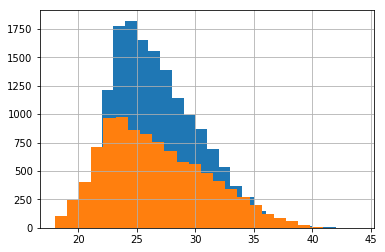

In [232]:
stats[stats['Year']<=2000]['Age'].hist(bins = 25)
stats[stats['Year']>2000]['Age'].hist(bins = 25)

### График 3
Посмотрим сколько в среднем в лиге в год команды забивали очков. Заметно что до 70х годов команды забивали всё больше с каждым сезеном, а с 70х годов команды стали забивать меньше очков. Это скорее всего связано с развитием тактических схем в баскетболе и с большим акцентом на защите. После 2004г опять наблюдается рост результативности. Это в первую очередь связано с требованием бизнеса к повышению зрелещности.  
Провалы в статистики в 1999 и 2012 связаны с локаутом игроков в лиге, когда часть сезона была отменена.

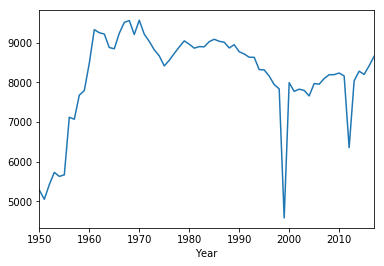

In [140]:
besttm1 = stats[stats['Tm']!='TOT'].groupby(['Year'])[['PTS']].sum()
besttm2 = stats[stats['Tm']!='TOT'].groupby(['Year'])[['Tm']].nunique()
result = pd.concat([besttm1, besttm2], axis=1).reindex(besttm1.index)
(result['PTS']/result['Tm']).plot()


### График 4
Определим 5 команд, которые в 21 веке забивали больше всех очков и посмотрим на их тенденцию. Заметно, что Golden State Warriors в последние годы забивает гораздо больше своих оппонетов.

In [207]:
besttm = stats[stats['Tm']!='TOT'][stats['Year']>2000].groupby(['Tm'])[['PTS']].sum().sort_values('PTS', ascending=False).head(5)
besttm
besttm = pd.pivot_table(stats[stats['Tm'].isin(besttm.index)][stats['Year']>2000], values='PTS', index='Year',columns='Tm', aggfunc=np.sum).fillna(0)
# besttm.plot()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [208]:
trace0 = go.Scatter(
    x=besttm.index,
    y=besttm['DAL'],
    name='Dallas Mavericks (DAL)'
)

trace1 = go.Scatter(
    x=besttm.index,
    y=besttm['DEN'],
    name='Denver Nuggets (DEN)'
)

trace2 = go.Scatter(
    x=besttm.index,
    y=besttm['GSW'],
    name='Golden State Warriors (GSW)'
)

trace3 = go.Scatter(
    x=besttm.index,
    y=besttm['PHO'],
    name='Phoenix Suns (PHO)'
)

trace4 = go.Scatter(
    x=besttm.index,
    y=besttm['SAC'],
    name='Sacramento Kings (SAC)'
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = {'title': 'TOP-5 statistics of points'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

### График 5
Проверим гипотезу, что Golden State Warriors (GSW) в последние годы забивает гораздо больше своих оппонетов за счет ставки на 3х-очковые броски. На тепловом графике видно явное лидерство Golden State Warriors по забитым 3ч-очковым броскам за последние 5 лет, при этом количество забитых 2ч-очковых бросков сохраняется на уровне с остальными командами.

In [209]:
besttmt = stats[stats['Tm']!='TOT'][stats['Year']>2000].groupby(['Tm'])[['PTS']].sum().sort_values('PTS', ascending=False).head(5)
pivtab1 = pd.pivot_table(stats[stats['Tm'].isin(besttmt.index)][stats['Year']>2007], 
                        values='3P', index='Year',columns='Tm', 
                        aggfunc=np.mean).fillna(0)
pivtab2 = pd.pivot_table(stats[stats['Tm'].isin(besttmt.index)][stats['Year']>2007], 
                        values='2P', index='Year',columns='Tm', 
                        aggfunc=np.mean).fillna(0)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



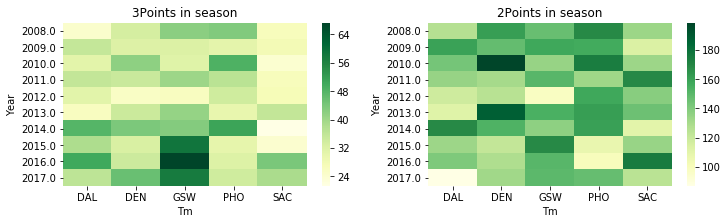

In [211]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
htm1 = sns.heatmap(pivtab1, cmap="YlGn")
htm1.set_title('3Points in season')
# g.fig.set_size_inches(15,15)
plt.subplot(1, 2, 2)
htm2 = sns.heatmap(pivtab2, cmap="YlGn")
htm2.set_title('2Points in season')
plt.show()